In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Pandas display options to supress scientifc notation and show all columns and all rows if necessary. Puts a lot of strain of processor

In [2]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pd.options.display.float_format= '{:.2f}'.format

In [3]:
nyse = pd.read_csv(os.path.join('Resources', 'nyse.csv'))
nasdaq = pd.read_csv(os.path.join('Resources', 'nasdaq.csv'))
amex = pd.read_csv(os.path.join('Resources', 'amex.csv'))

frames = [nyse, nasdaq, amex]
tickers = pd.concat(frames).sort_values(by='Ticker')

In [4]:
data_2018 = pd.read_csv(os.path.join('Resources', '2018_Financial_Data.csv')).\
rename(columns={'Unnamed: 0':'Ticker'}).\
sort_values(by='Ticker').\
reset_index(drop=True)

df = tickers.merge(data_2018, on='Ticker')

In [5]:
df['Market Cap Size'] = ['Large Cap' if x > 10000000000 else 'Mid Cap' if x > 2000000000 else 'Small Cap' for x in df['Market Cap']]

Note: In *__data_2018__* we had 4392 observations. When we merged with our *__tickers__* dataframe which had 8000+ tickers and company names from exchanges we lost 150 observations. These can be retrieved with 
``` 
data_2018[~data_2018.Ticker.isin(tickers['Ticker'])]
```
Here the **~** symbol essentially means NOT IN when we filter.\
Lastly, a dataframe with just indicators we can manipulate. We can filter out some of the columns containing information we don't need then pass this as a filter to our working dataframe with ```df[x['indicator']]```

In [ ]:
indicators = pd.DataFrame({
   'Indicator': df.iloc[:,2:-3].columns.tolist()
})

x = indicators[indicators['Indicator'].str.contains('Growth|Margin|growth|ratio|Ratio|Turnover|per') == False]

In [ ]:
cond = x['Indicator'].tolist()

## Conditional Filtering

In [ ]:
tickers[tickers['Company Name'].str.contains('S&P') == True];

In [ ]:
df[df['Company Name'].str.contains('Bond') == True];

In [ ]:
df[df['Ticker'].str.startswith('X') == True];

In [ ]:
df[df['Revenue Growth'] > 10].sort_values(by='Revenue', ascending=False).head()

## Graphs and Visualizations

Following two cells achieve the same result by diff methods

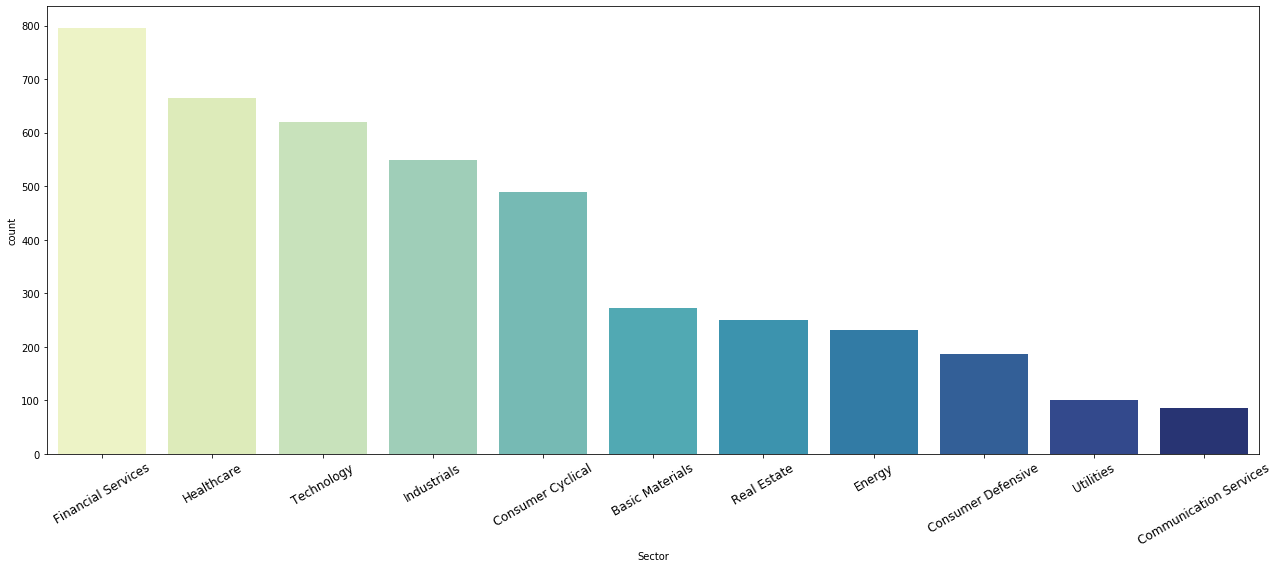

In [8]:
plt.figure(figsize=(18,8))
sns.countplot(x='Sector', data = df, palette='YlGnBu', order=df['Sector'].value_counts().index).set_xticklabels(labels = df['Sector'].value_counts().index, fontdict={'fontsize': 12},rotation=30)
plt.tight_layout()
# plt.savefig(os.path.join('Figures','StockVolume_Sector.png'))

NameError: name 'sector_count' is not defined

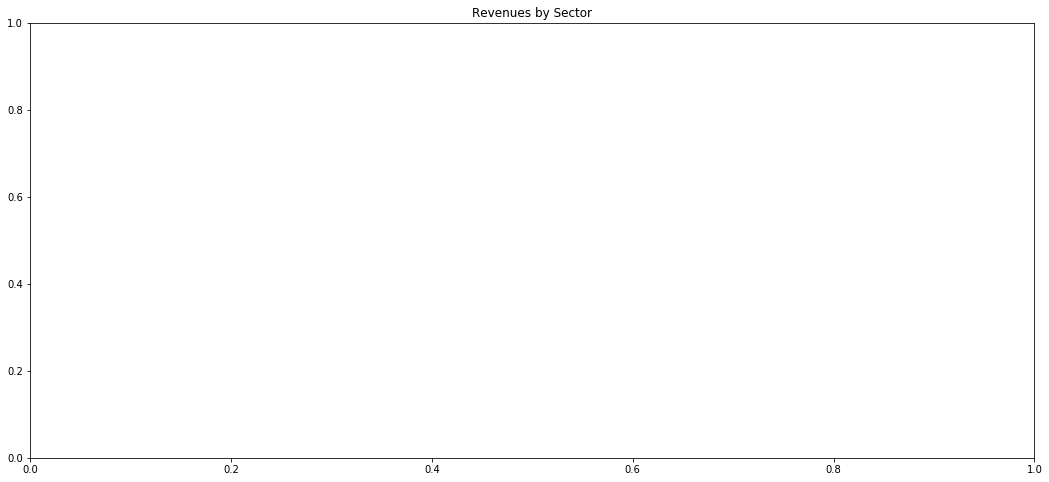

In [10]:
sector_rev = pd.DataFrame(df.groupby(['Sector']).mean()['Revenue']).reset_index().sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(18,8))
plt.title('Revenues by Sector')
sns.barplot(x = sector_rev['Sector'], y = sector_rev['Revenue'], palette='YlGnBu',).set_xticklabels(labels = sector_count['Sector'], fontdict={'fontsize': 12}, rotation=30)
plt.tight_layout();
# plt.savefig(os.path.join('Figures','StockVolume_Sector.png'))

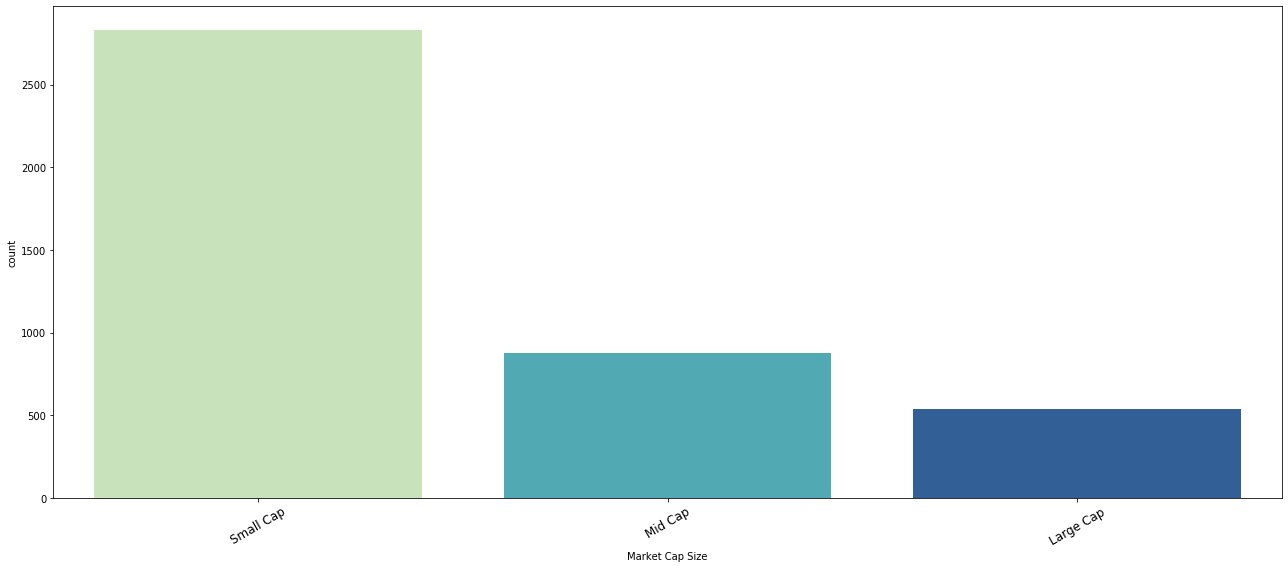

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x='Market Cap Size', data = df, palette='YlGnBu', order=df['Market Cap Size'].value_counts().index).set_xticklabels(labels = df['Market Cap Size'].value_counts().index, fontdict={'fontsize': 12},rotation=30)
plt.tight_layout()

In [ ]:
sns.pairplot(df, vars = ['2019 PRICE VAR [%]', 'R&D Expenses', 'SG&A Expense',], dropna = True, hue='Sector', palette='YlGnBu_d')

In [ ]:
corrs = df[cond].corr();

In [ ]:
df.cov();

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corrs, center=0)

## Regression Analysis

In [ ]:
y = df["2019 PRICE VAR [%]"]

X = sm.add_constant(df[x['Indicator']].fillna(0))

reg = sm.OLS(y, X).fit()

reg.summary();

In [ ]:
# df.to_csv(os.path.join('2018_data.csv'))